In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


In [204]:
df = pd.read_csv('train.csv')

In [205]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
df.drop(columns =['Cabin'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [208]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [209]:
## fixing null values in Age
median_age = df['Age'].median()
new_df = df
new_df['Age'] = new_df['Age'].fillna(median_age)
new_df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [210]:
#dropping null columns in embarked
new_df.dropna(axis =0,inplace = True)
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [211]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [212]:
new_df.drop(columns =['Ticket'], inplace = True)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [213]:
new_df['Embarked'].unique()
#S = Southampton
#C = Cherbourg
#Q = Queenstown

array(['S', 'C', 'Q'], dtype=object)

In [214]:
#one hot encoding for embarked
one_hot = pd.get_dummies(new_df['Embarked'])
new_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [215]:
new_df = pd.concat([new_df, one_hot], axis=1)

In [216]:
new_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True


In [217]:
#converting sex using encoding
le = LabelEncoder()
new_df['sex_label'] = le.fit_transform(new_df['Sex'])

#1 ->male   0 -> female
new_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,False,False,True,1


In [218]:

new_df.drop(columns =['Name'], inplace = True)


In [219]:
new_df.head(5)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,1


<Axes: >

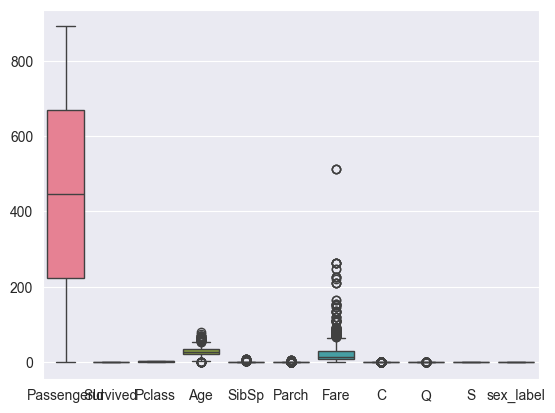

In [220]:
sns.boxplot(data = new_df)

In [221]:
#more outlier detection
Q1 = new_df['Fare'].quantile(0.25)
Q3 = new_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = new_df[(new_df['Fare'] < (Q1 - 1.5 * IQR)) | (new_df['Fare'] > (Q3 + 1.5 * IQR))]
outliers.shape


(114, 13)

In [222]:
#group by
new_df.groupby('Sex')['Survived'].mean()


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [223]:
new_df.duplicated().sum()               #no duplicates

0

In [224]:
new_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
C              0
Q              0
S              0
sex_label      0
dtype: int64

In [225]:
new_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,1
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,0
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,0
3,4,1,1,female,35.0,1,0,53.1000,S,False,False,True,0
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,1


In [226]:
#Feature Engineering
new_df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   C            889 non-null    bool   
 10  Q            889 non-null    bool   
 11  S            889 non-null    bool   
 12  sex_label    889 non-null    int32  
 13  Family_Size  889 non-null    int64  
dtypes: bool(3), float64(2), int32(1), int64(6), object(2)
memory usage: 82.5+ KB


In [227]:
new_df["Alone"] = np.where(new_df["Family_Size"] == 1,1,0)

In [228]:
#Fare per person
new_df['FarePerPerson'] = new_df['Fare'] / (new_df['Family_Size'] + 1)
new_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,1,2,0,2.416667
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,0,2,0,23.761100
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,0,1,1,3.962500
3,4,1,1,female,35.0,1,0,53.1000,S,False,False,True,0,2,0,17.700000
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,1,1,1,4.025000


In [195]:
#now starting the visualization
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.000000,446.000000,668.0000,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.000000,0.000000,1.0000,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.000000,3.000000,3.0000,3.0000
Age,889.0,29.315152,12.984932,0.42,22.000000,28.000000,35.0000,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.000000,0.000000,1.0000,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.000000,0.000000,0.0000,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.895800,14.454200,31.0000,512.3292
sex_label,889.0,0.649044,0.477538,0.00,0.000000,1.000000,1.0000,1.0000
Family_Size,889.0,1.906637,1.614703,1.00,1.000000,1.000000,2.0000,11.0000
Alone,889.0,0.601800,0.489803,0.00,0.000000,1.000000,1.0000,1.0000


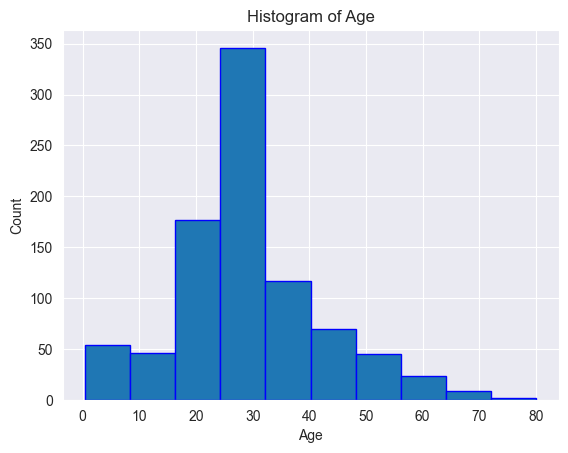

In [28]:
new_df['Age'].hist(bins = 10 , edgecolor = 'blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

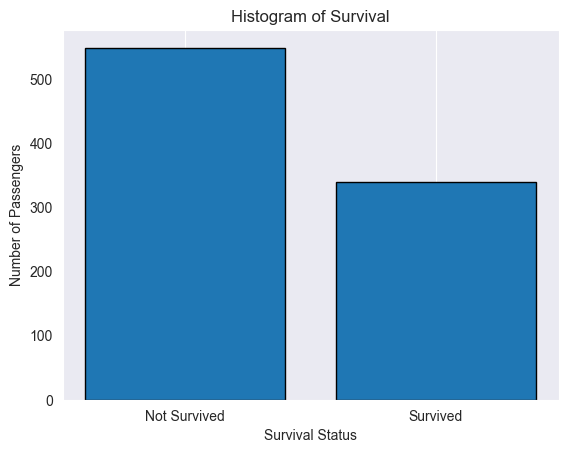

In [29]:
plt.hist(new_df['Survived'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Survival')
plt.grid(axis='y')
plt.show()

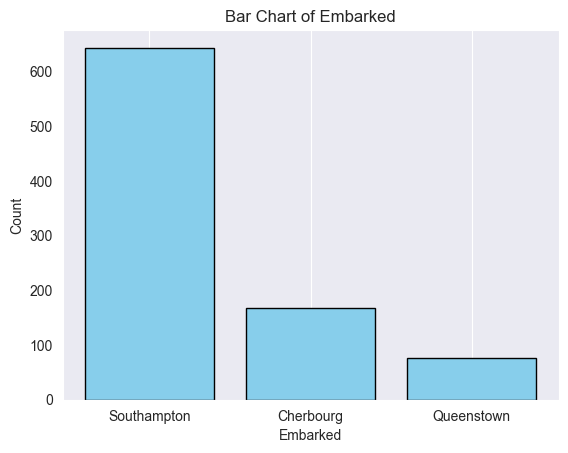

In [30]:
embarked_counts = new_df['Embarked'].value_counts()

plt.bar(embarked_counts.index, embarked_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Bar Chart of Embarked')
plt.grid(axis='y')
plt.xticks(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()


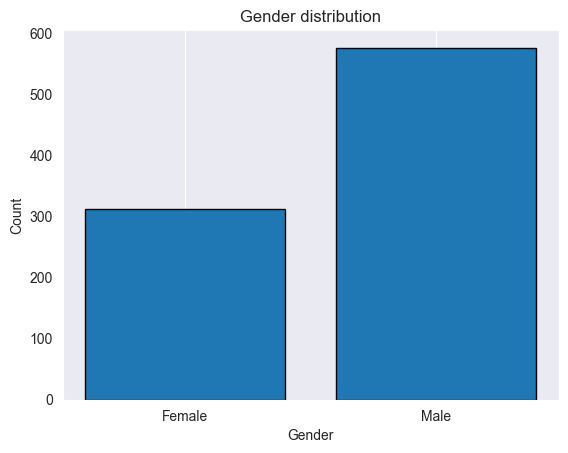

In [31]:
plt.hist(new_df['sex_label'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

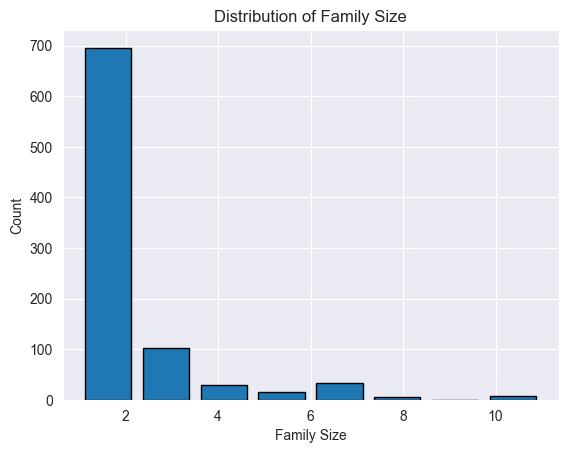

In [32]:
plt.hist(new_df['Family_Size'],bins = 8, edgecolor='black', rwidth=0.8)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.show()

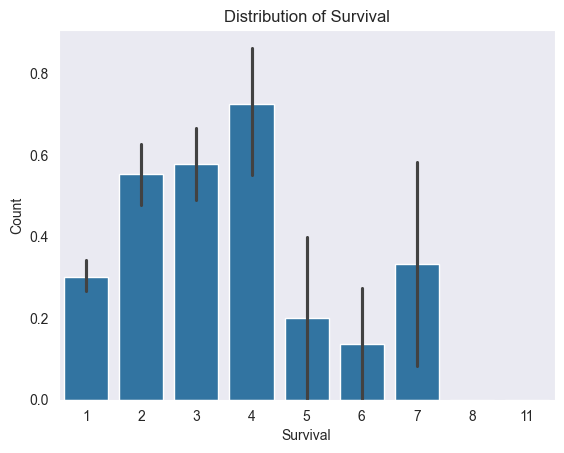

In [33]:
#Bi - Variant Analysis
#familySize vs survived
sns.barplot(data = new_df, x = 'Family_Size', y = 'Survived')
plt.title('Distribution of Survival')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

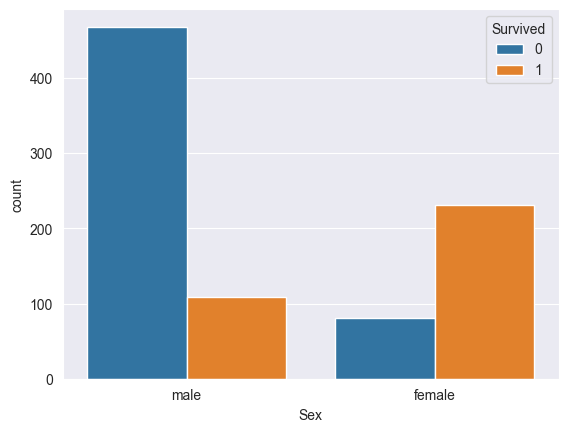

In [236]:
sns.countplot(data=new_df, x='Sex', hue='Survived')
plt.show()


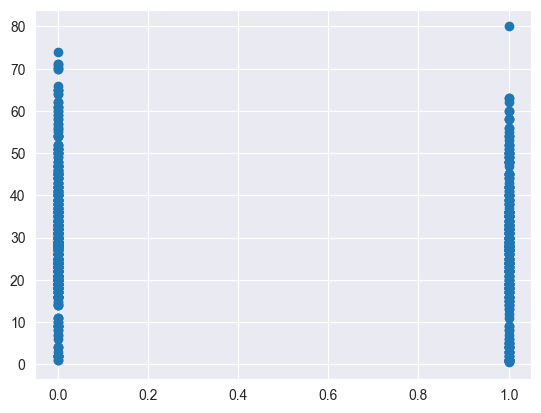

In [237]:
plt.scatter( new_df['Survived'],new_df['Age'] )
plt.show()

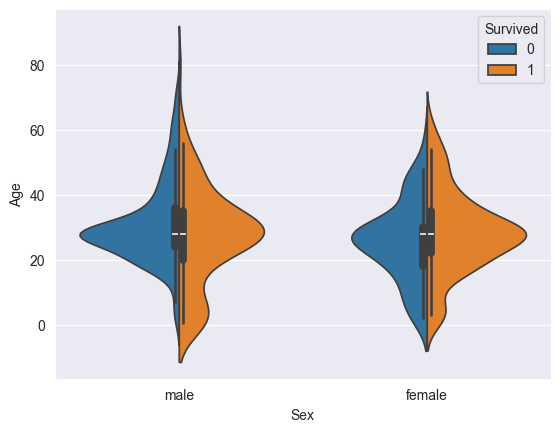

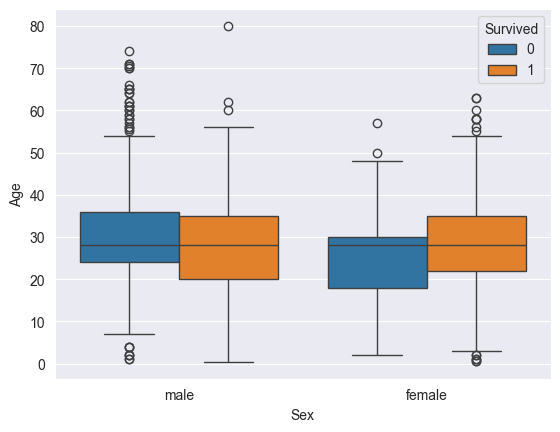

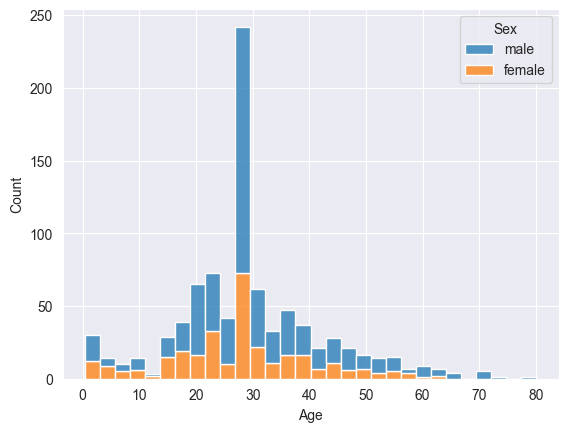

In [238]:
sns.violinplot(data=new_df, x='Sex', y='Age', hue='Survived', split=True)
plt.show()
sns.boxplot(data=new_df, x='Sex', y='Age', hue='Survived')
plt.show()
sns.histplot(data=new_df, x='Age', hue='Sex', multiple='stack')
plt.show()

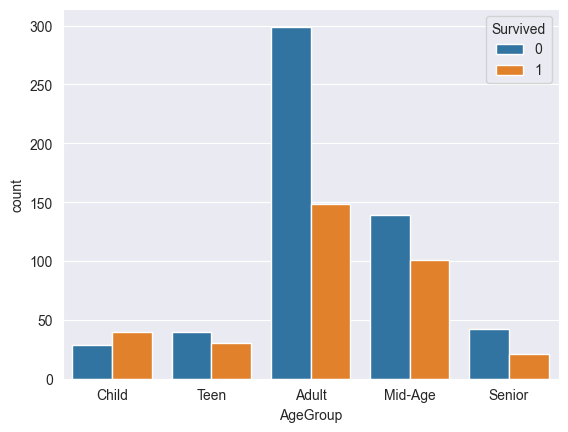

In [240]:
new_df['AgeGroup'] = pd.cut(new_df['Age'], bins=[0, 12, 18, 30, 50, 80],
                            labels=['Child', 'Teen', 'Adult', 'Mid-Age', 'Senior'])
sns.countplot(data=new_df, x='AgeGroup', hue='Survived')
plt.show()

le = LabelEncoder()
new_df['AgeGroup'] = le.fit_transform(new_df['AgeGroup'])

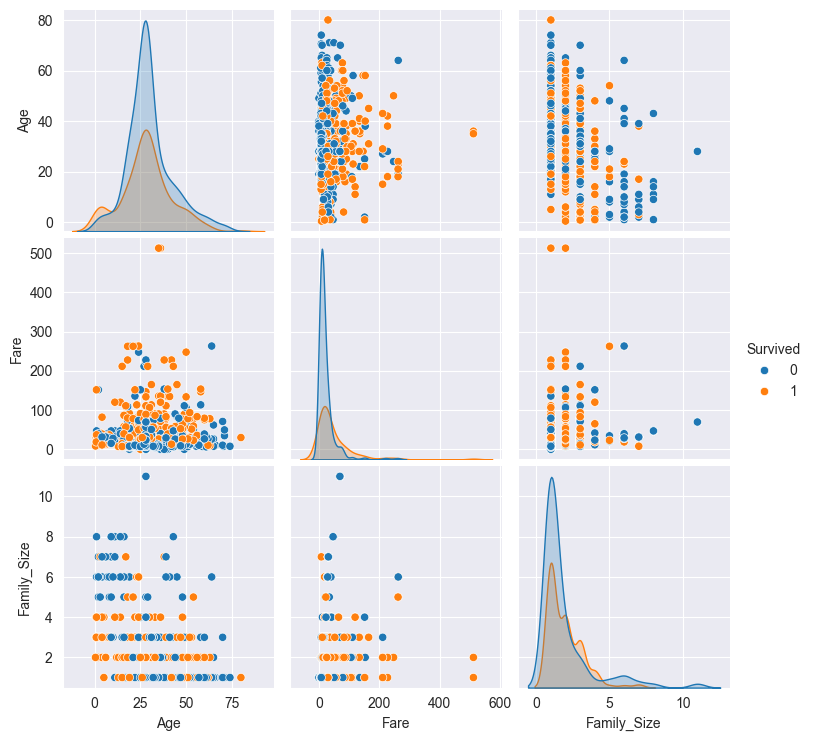

In [241]:
sns.pairplot(new_df[['Age', 'Fare', 'Survived', 'Family_Size']], hue='Survived')
plt.show()


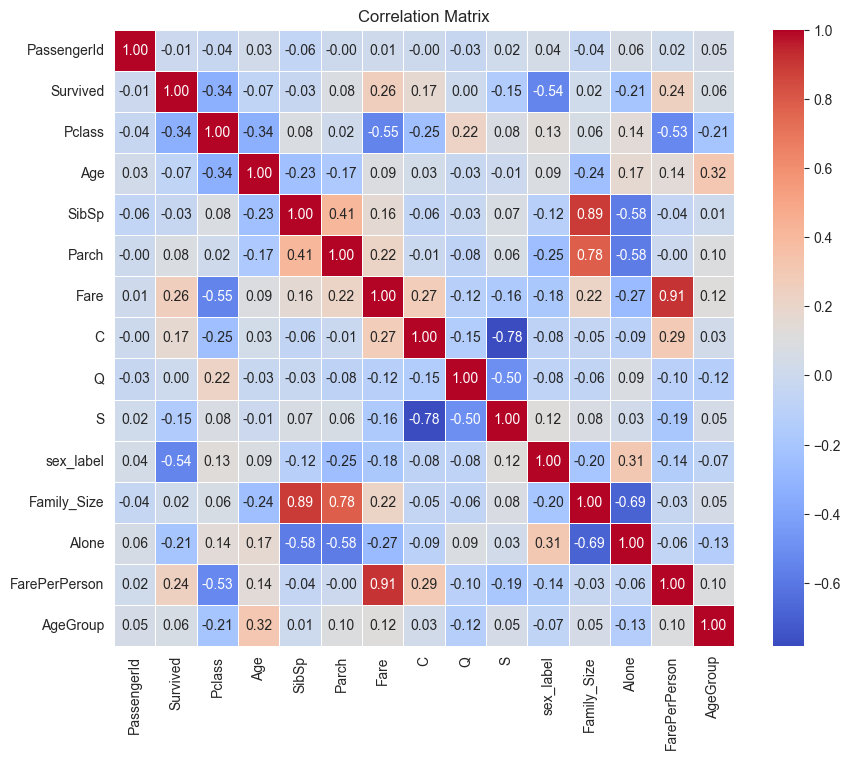

In [242]:
corr_matrix = new_df.corr(numeric_only=True)  # Use numeric_only if dataframe has categorical columns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [243]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,sex_label,Family_Size,Alone,FarePerPerson,AgeGroup
0,1,0,3,male,22.0,1,0,7.2500,S,False,False,True,1,2,0,2.416667,0
1,2,1,1,female,38.0,1,0,71.2833,C,True,False,False,0,2,0,23.761100,2
2,3,1,3,female,26.0,0,0,7.9250,S,False,False,True,0,1,1,3.962500,0
3,4,1,1,female,35.0,1,0,53.1000,S,False,False,True,0,2,0,17.700000,2
4,5,0,3,male,35.0,0,0,8.0500,S,False,False,True,1,1,1,4.025000,2


In [244]:
X = new_df[['Pclass', 'sex_label','Age','Alone','SibSp','FarePerPerson','AgeGroup']]
y = new_df['Survived']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Support Vector Machine": SVC(probability=True)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
        cm = confusion_matrix(y_test, y_pred)

        print(f"\n================ {name} =================")
        print(f"Accuracy        : {acc:.4f}")
        print(f"Precision       : {prec:.4f}")
        print(f"Recall          : {rec:.4f}")
        print(f"F1 Score        : {f1:.4f}")
        print(f"ROC AUC Score   : {auc}")
        print(f"\nConfusion Matrix:\n{cm}")
        print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

In [248]:
evaluate_models(X_train, X_test, y_train, y_test)



================ Logistic Regression =================
Accuracy        : 0.8146
Precision       : 0.7368
Recall          : 0.8116
F1 Score        : 0.7724
ROC AUC Score   : 0.8548730222044942

Confusion Matrix:
[[89 20]
 [13 56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178


================ Random Forest =================
Accuracy        : 0.7865
Precision       : 0.7183
Recall          : 0.7391
F1 Score        : 0.7286
ROC AUC Score   : 0.8441696582901209

Confusion Matrix:
[[89 20]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.72      0.74      0.73        69

    a

In [251]:
# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

In [252]:
import numpy as np

feature_names = ['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'FamilySize', 'IsAlone']
coefficients = models.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")


AttributeError: 'dict' object has no attribute 'coef_'

In [125]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"----- {name} -----")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print()

----- Logistic Regression -----
Accuracy:  0.7921
Precision: 0.7051
Recall:    0.7971
F1 Score:  0.7483
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       109
           1       0.71      0.80      0.75        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.80      0.79      0.79       178


----- Decision Tree -----
Accuracy:  0.8315
Precision: 0.8095
Recall:    0.7391
F1 Score:  0.7727
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       109
           1       0.81      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178


----- Random Forest -----
Accuracy:  0.8146
Precision: 0.7647
Recall:    0.7536
F1 Score:  0.7591
              precision    recall  f1-score 

In [256]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Linear SVM": SVC(kernel='linear', probability=True)
}

# Train your models
for name, model in models.items():
    model.fit(X_train, y_train)
    models[name] = model  # Store trained model back

# Features list
feature_names = ['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S', 'FamilySize', 'IsAlone']

# Store coefficients
results = []

for name, model in models.items():
    if hasattr(model, 'coef_'):
        coefs = model.coef_[0]
        results.append(pd.Series(coefs, index=feature_names, name=name))

# Combine into a DataFrame
coeff_df = pd.concat(results, axis=1)

# Display nicely
print(coeff_df.round(4))


            Logistic Regression  Linear SVM
Pclass                  -0.9204     -0.0002
Sex                     -1.2459     -0.9448
Fare                    -0.5920     -0.0001
Embarked_C              -0.3249     -0.1398
Embarked_S              -0.7541     -0.3337
FamilySize               0.0570     -0.0000
IsAlone                  0.0667      0.0000


In [257]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

tree_models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train your models
for name, model in tree_models.items():
    model.fit(X_train, y_train)
    tree_models[name] = model

# Store feature importances
tree_results = []

for name, model in tree_models.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        tree_results.append(pd.Series(importances, index=feature_names, name=name))

# Combine into a DataFrame
tree_df = pd.concat(tree_results, axis=1)

# Display nicely
print(tree_df.round(4))


            Random Forest  Gradient Boosting
Pclass             0.0731             0.1251
Sex                0.2581             0.4451
Fare               0.2303             0.1724
Embarked_C         0.0207             0.0013
Embarked_S         0.0527             0.0474
FamilySize         0.3229             0.2049
IsAlone            0.0423             0.0037


In [258]:
combined_df = pd.concat([coeff_df, tree_df], axis=1)
print(combined_df.round(4))


            Logistic Regression  Linear SVM  Random Forest  Gradient Boosting
Pclass                  -0.9204     -0.0002         0.0731             0.1251
Sex                     -1.2459     -0.9448         0.2581             0.4451
Fare                    -0.5920     -0.0001         0.2303             0.1724
Embarked_C              -0.3249     -0.1398         0.0207             0.0013
Embarked_S              -0.7541     -0.3337         0.0527             0.0474
FamilySize               0.0570     -0.0000         0.3229             0.2049
IsAlone                  0.0667      0.0000         0.0423             0.0037


In [259]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize list to store results
accuracy_results = []

# Loop through each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append({
        'Model': name,
        'Accuracy': round(acc, 4)
    })

# If you also have tree models:
for name, model in tree_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results.append({
        'Model': name,
        'Accuracy': round(acc, 4)
    })

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_results)

# Sort by accuracy descending
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display
print(accuracy_df)


                 Model  Accuracy
0  Logistic Regression    0.8146
1           Linear SVM    0.8034
2    Gradient Boosting    0.8034
3        Random Forest    0.7809
